# UNIDAD 2 - PROYECTO: EDA + REGRESIÓN + PRUEBAS DE HIPÓTESIS 

## Nombre del estudiante: Alan Jafet Leon Loeza
## Número de control: 20120126

# ETAPA 1: Exploración de los datos.

## Paso 1: Cargue el dataset ("Retrasos.csv") en un dataframe, muestre información básica, enliste las columnas numéricas y las columnas objeto.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
# Su código aquí.
df = pd.read_csv("Retrasos.csv")
display(df.head())

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_value,pack_price,unit_price,unit_cost,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203,Nigeria,PMO - US,Direct Drop,EXW,Air,1,Yes,HRDT,HIV test,...,266644.00,89.00,0.89,0.3,"Alere Medical Co., Ltd.",Yes,1426,33279.83,expensive,373.83
1,30998,Botswana,PMO - US,Direct Drop,EXW,Air,0,No,HRDT,HIV test,...,800.00,32.00,1.60,NaN,"Trinity Biotech, Plc",Yes,10,559.89,reasonable,1.72
2,69871,Vietnam,PMO - US,Direct Drop,EXW,Air,0,No,ARV,Adult,...,110040.00,4.80,0.08,NaN,Hetero Unit III Hyderabad IN,Yes,3723,19056.13,expensive,181.57
3,17648,South Africa,PMO - US,Direct Drop,DDP,Ocean,0,No,ARV,Adult,...,361507.95,2.37,0.04,NaN,"Aurobindo Unit III, India",Yes,7698,11372.23,expensive,779.41
4,5647,Uganda,PMO - US,Direct Drop,EXW,Air,0,No,HRDT,HIV test - Ancillary,...,8.50,0.01,0.00,NaN,Inverness Japan,Yes,56,360.00,reasonable,0.01


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   int64  
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

## Paso 2: Haga conteo de datos nulos (ordene de forma descendente); de las variables numéricas, muestre datos estadísticos; de las variables de tipo objeto, determine cuáles sí son factibles para convertir en categóricas y el porqué.

In [4]:
# Su código aquí.
#Contabilizando nulos
print(df.isna().sum().sort_values(ascending=False))

unit_cost                   983
dosage                      409
line_item_insurance_usd      34
freight_cost_groups          14
freight_cost_usd             14
fulfill_via                   0
unit_of_measure_per_pack      0
weight_kilograms              0
first_line_designation        0
manufacturing_site            0
managed_by                    0
unit_price                    0
pack_price                    0
line_item_value               0
line_item_quantity            0
dosage_form                   0
vendor_inco_term              0
country                       0
brand                         0
molecule_test_type            0
item_description              0
vendor                        0
sub_classification            0
product_group                 0
late                          0
late_delivery                 0
shipment_mode                 0
id                            0
dtype: int64


In [5]:
#datos estadisticos para datos numericos
display(df.describe())

,id,late_delivery,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,unit_cost,weight_kilograms,freight_cost_usd,line_item_insurance_usd
count,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,17.000000,1000.000000,986.000000,966.000000
mean,39239.957000,0.06100,78.675000,15923.379000,1.542272e+05,36.570830,1.094050,0.302294,1947.682000,10896.676856,245.143209
std,24878.296938,0.23945,91.124569,37793.936877,2.160517e+05,47.611183,3.356263,0.351540,3125.348148,14267.588869,357.305275
min,1.000000,0.00000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,30.000000,0.000000
25%,17055.000000,0.00000,30.000000,600.000000,1.181160e+04,6.497500,0.110000,0.050000,162.750000,1946.497500,16.845000
50%,38283.500000,0.00000,60.000000,2992.000000,6.360000e+04,21.000000,0.380000,0.120000,909.000000,5806.750000,100.700000
75%,62036.500000,0.00000,100.000000,11733.000000,2.178262e+05,70.000000,0.890000,0.500000,2526.000000,14821.792500,330.000000
max,82105.000000,1.00000,1000.000000,515000.000000,2.458454e+06,400.000000,24.500000,1.100000,38681.000000,161962.320000,3446.750000


In [6]:
#determinar que columnas de tipo objeto son factibles para categorizar
columnas_objeto = df.select_dtypes(include=[object]).columns
for columna in columnas_objeto:
    print("valores unicos de la columna",columna, ":" ,df[columna].nunique())

valores unicos de la columna country : 31
valores unicos de la columna managed_by : 1
valores unicos de la columna fulfill_via : 1
valores unicos de la columna vendor_inco_term : 5
valores unicos de la columna shipment_mode : 3
valores unicos de la columna late : 2
valores unicos de la columna product_group : 4
valores unicos de la columna sub_classification : 6
valores unicos de la columna vendor : 36
valores unicos de la columna item_description : 105
valores unicos de la columna molecule_test_type : 62
valores unicos de la columna brand : 33
valores unicos de la columna dosage : 41
valores unicos de la columna dosage_form : 15
valores unicos de la columna manufacturing_site : 50
valores unicos de la columna first_line_designation : 1
valores unicos de la columna freight_cost_groups : 2


En general en posible categorizar en la mayoria de las columnas, considero que es factible en las que sus valores unicos esten por debajo de 15, en estas es posible aplicar un one-hot-encoding las de mayor interes a mi criterio son:late, sub_classification, product_group y dosage_form, entre algunas otras para las columnas con mas de 15 datos unicos veo factible categorizar las columnas :brand ,dosage , country y manufacturing_site, para columnas con valores muy grandes quiza sea posible crear nuevas categorias esto se sabra dependiendo de la correlacion mas adelante.

## Paso 3: Identifique si las columnas numéricas cuentan con anomalías, para ello puede apoyarse de gráficos; identifique si las columnas objeto tienen inconsistencias, para ello puede apoyarse de gráficos.

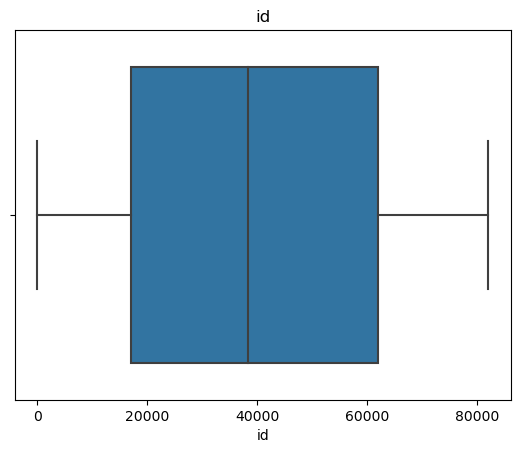

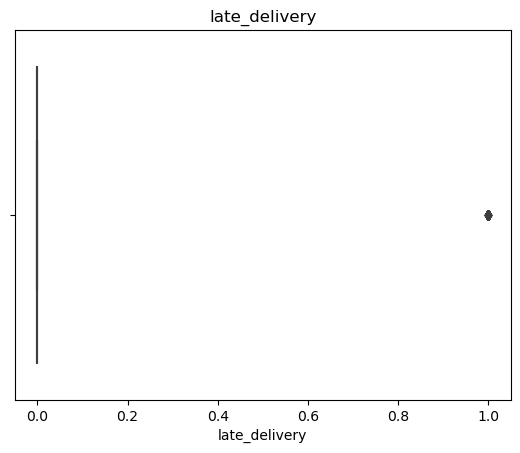

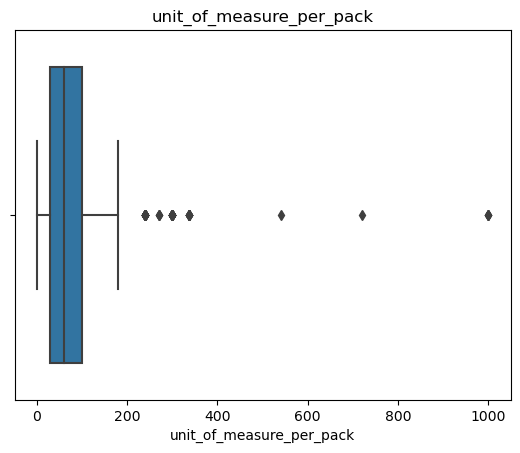

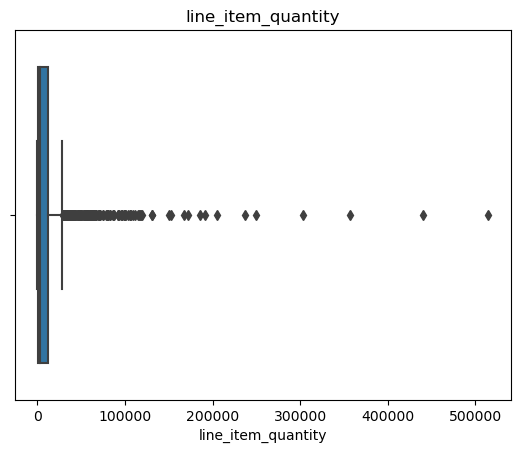

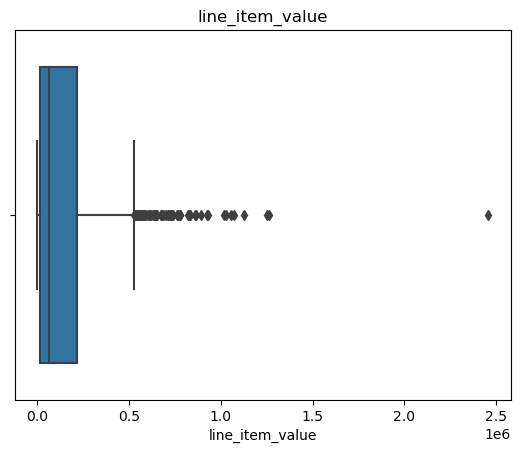

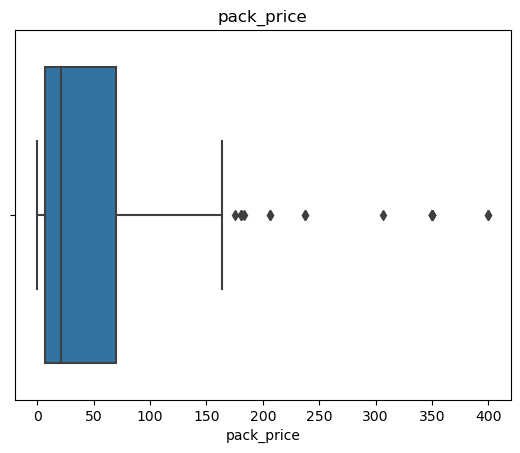

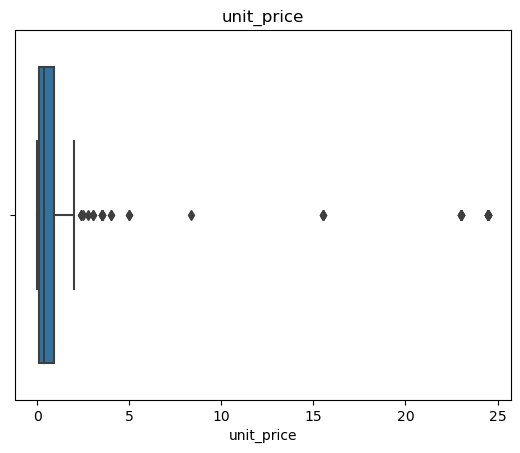

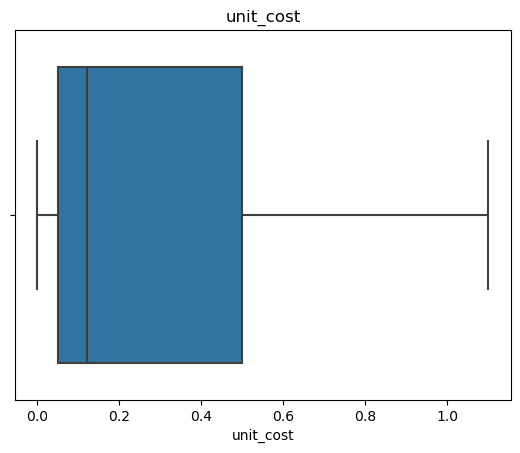

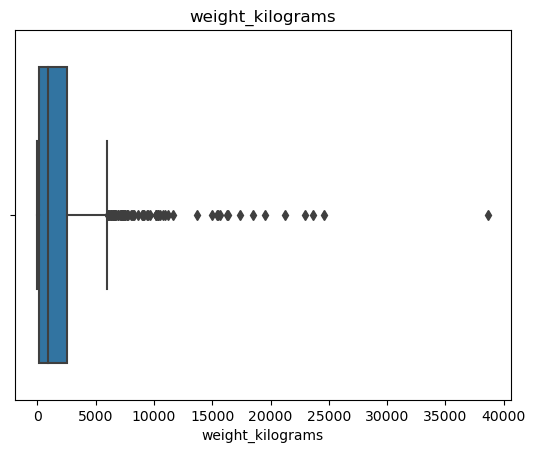

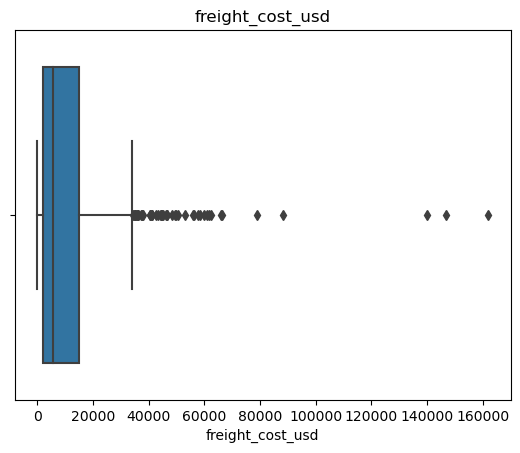

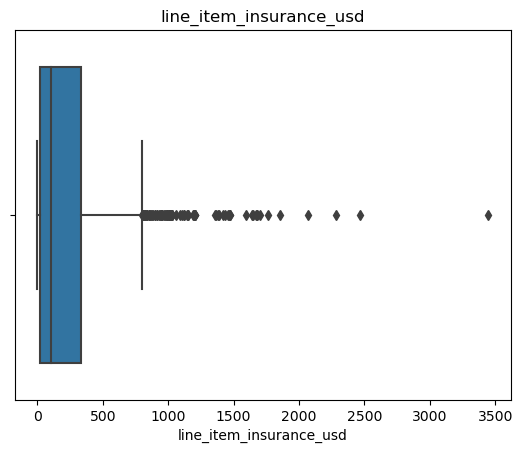

In [7]:
# Su código aquí.
# identificando anomalias
columnas_numericas = df.select_dtypes(include=['int', 'float']).columns

for columna in columnas_numericas:
    sns.boxplot(data=df, x=columna)
    plt.title(columna)
    plt.show()

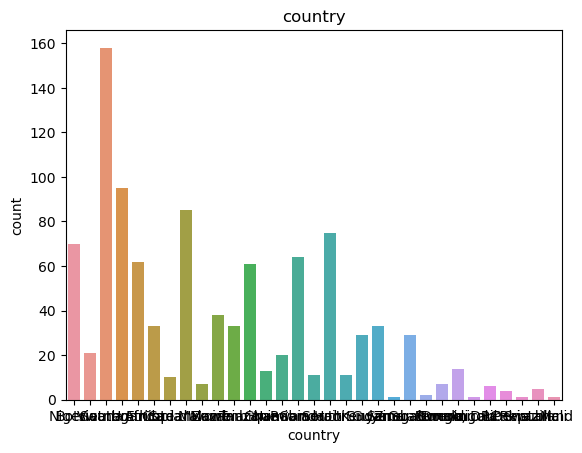

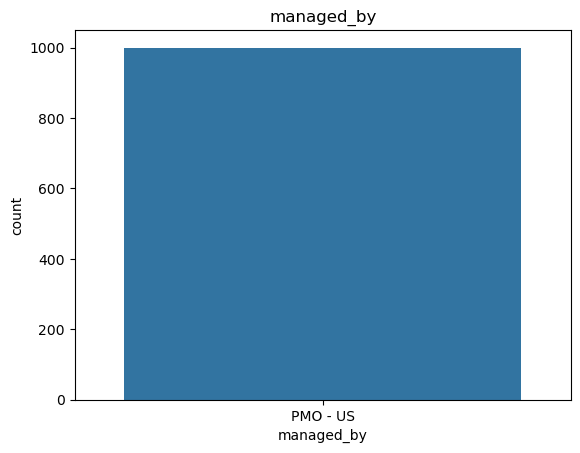

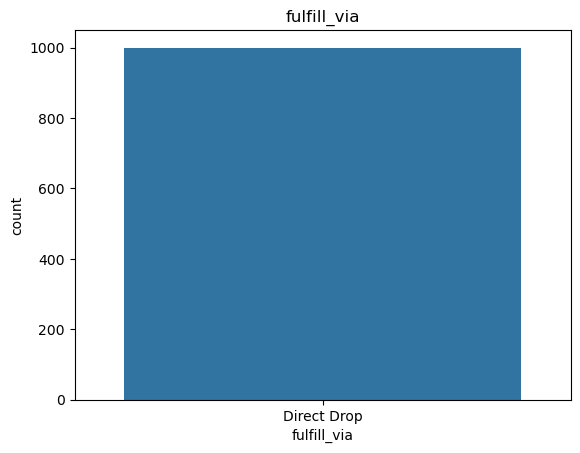

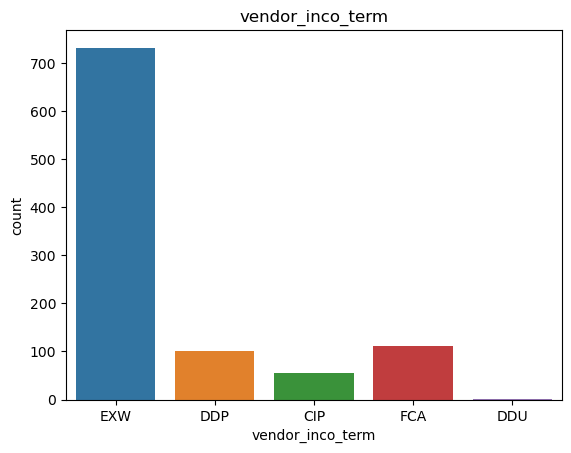

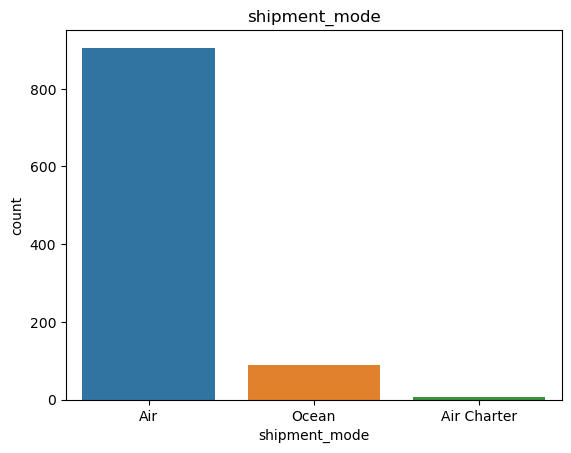

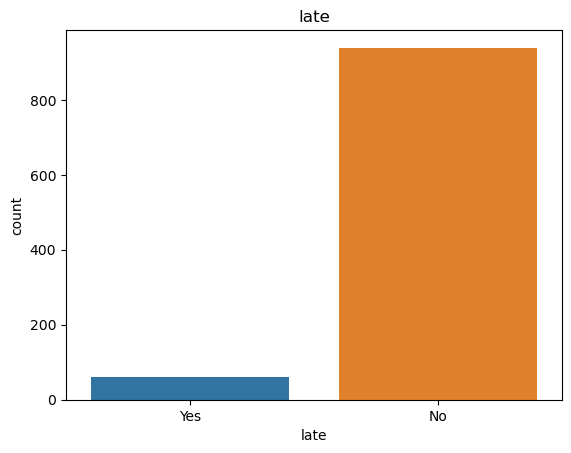

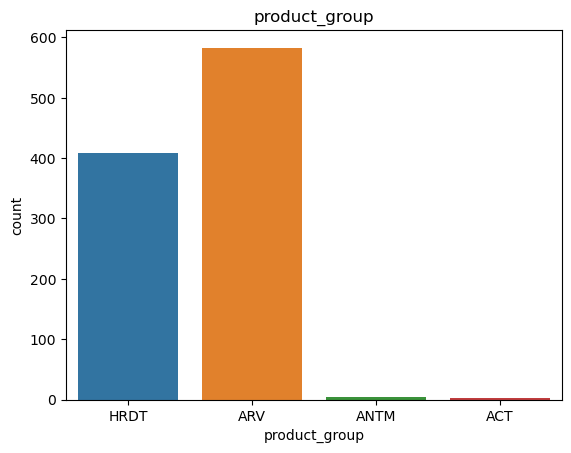

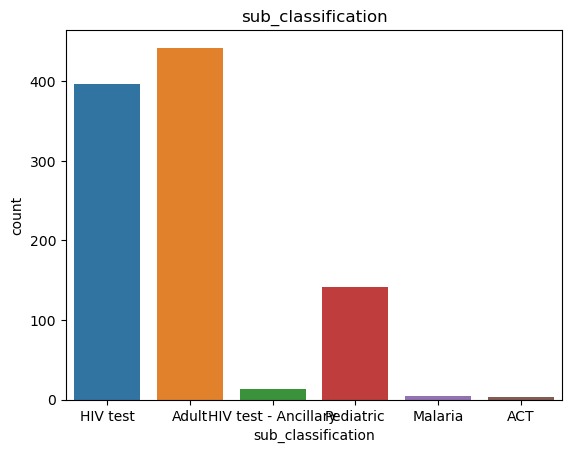

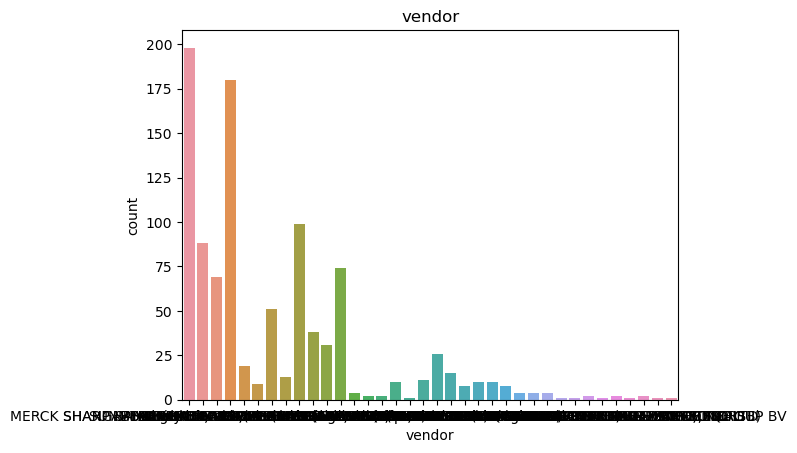

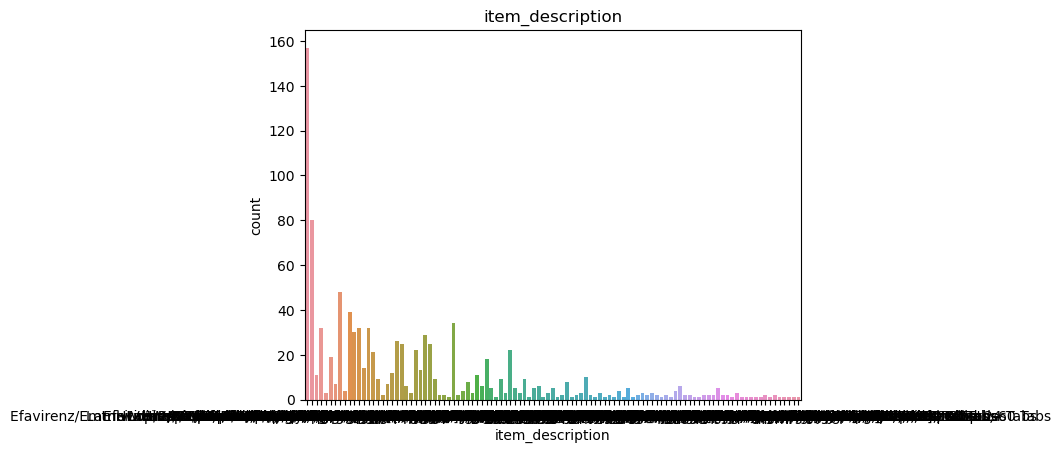

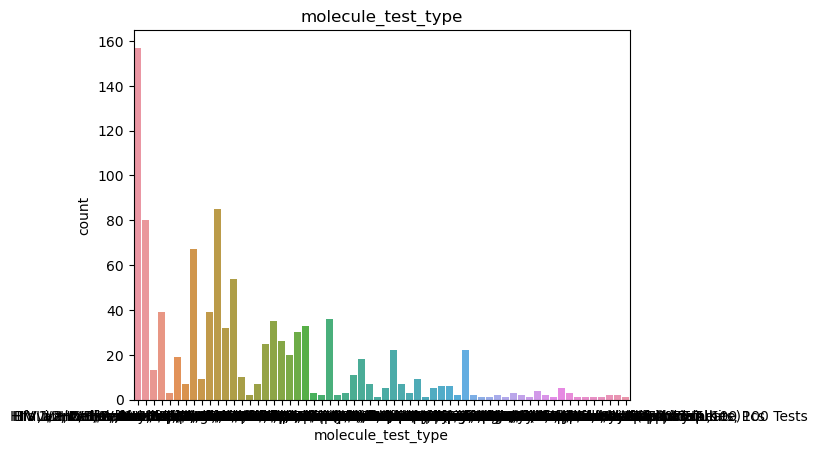

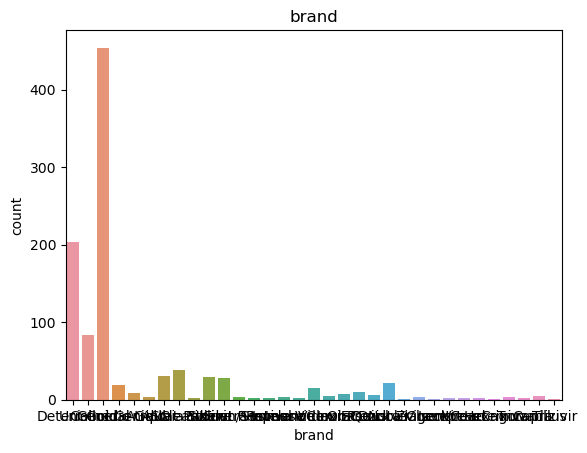

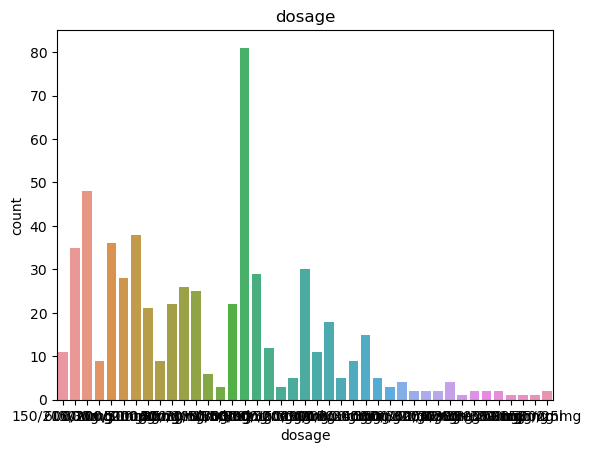

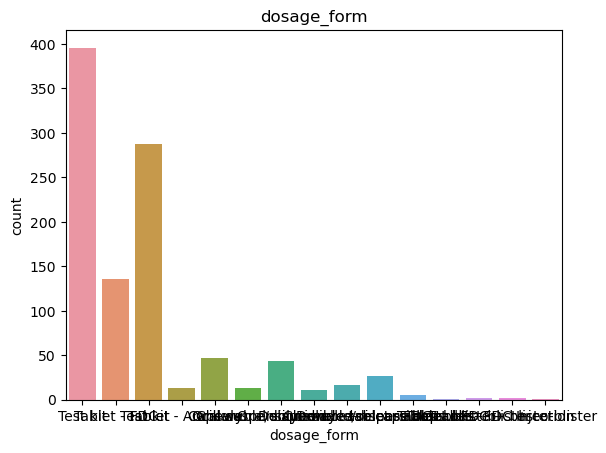

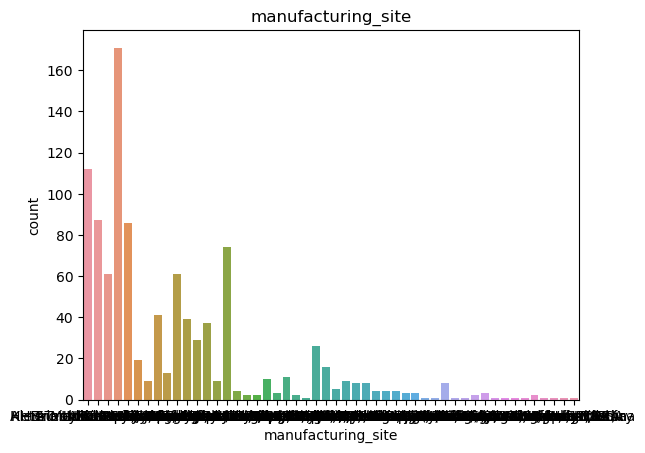

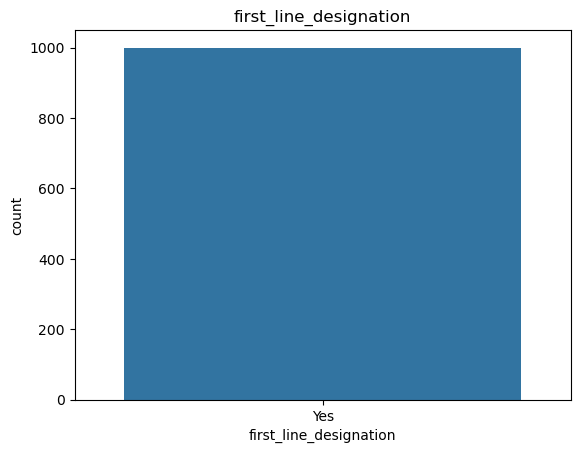

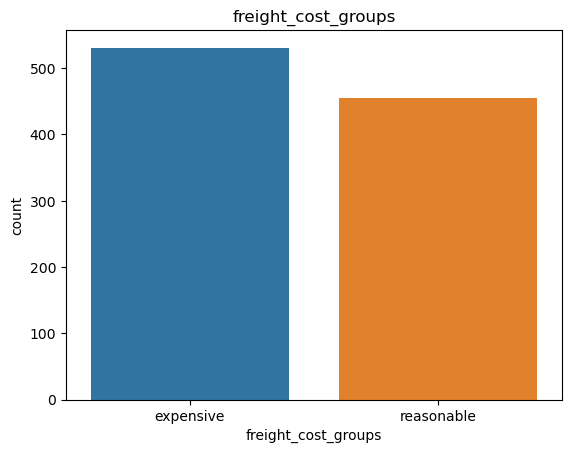

In [8]:
# identificando inconsistencias
columnas_objeto = df.select_dtypes(include=['object']).columns

for columna in columnas_objeto:
    sns.countplot(data=df, x=columna)
    plt.title(columna)
    plt.show()

## Paso 4: Muestre las correlaciones (pearson y spearman) que hay en general (valores numéricos), puede utilizar gráficos, ¿cambian mucho los valores entre cada tipo de coeficiente de correlación?

In [9]:
# Su código aquí.
# correlacion de pearson
display(df.corr(numeric_only=True))

,id,late_delivery,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,unit_cost,weight_kilograms,freight_cost_usd,line_item_insurance_usd
id,1.000000,0.060417,0.012164,0.091512,0.086113,-0.104808,-0.058841,-0.503447,0.056382,0.065017,0.066087
late_delivery,0.060417,1.000000,0.002790,0.040279,0.126246,0.051097,-0.042868,-0.034577,0.062662,0.063474,0.132006
unit_of_measure_per_pack,0.012164,0.002790,1.000000,-0.116644,-0.084325,0.206494,-0.162128,-0.431684,-0.043197,-0.018434,-0.079404
line_item_quantity,0.091512,0.040279,-0.116644,1.000000,0.607088,-0.238151,-0.090605,-0.181190,0.743863,0.251780,0.623454
line_item_value,0.086113,0.126246,-0.084325,0.607088,1.000000,0.011824,-0.030917,-0.189350,0.639865,0.572495,0.961744
pack_price,-0.104808,0.051097,0.206494,-0.238151,0.011824,1.000000,0.080424,0.385187,-0.207903,0.022590,0.017692
unit_price,-0.058841,-0.042868,-0.162128,-0.090605,-0.030917,0.080424,1.000000,0.800325,0.039405,0.282316,-0.038267
unit_cost,-0.503447,-0.034577,-0.431684,-0.181190,-0.189350,0.385187,0.800325,1.000000,-0.192516,-0.392305,-0.192415
weight_kilograms,0.056382,0.062662,-0.043197,0.743863,0.639865,-0.207903,0.039405,-0.192516,1.000000,0.496740,0.662617
freight_cost_usd,0.065017,0.063474,-0.018434,0.251780,0.572495,0.022590,0.282316,-0.392305,0.496740,1.000000,0.472532


<Axes: >

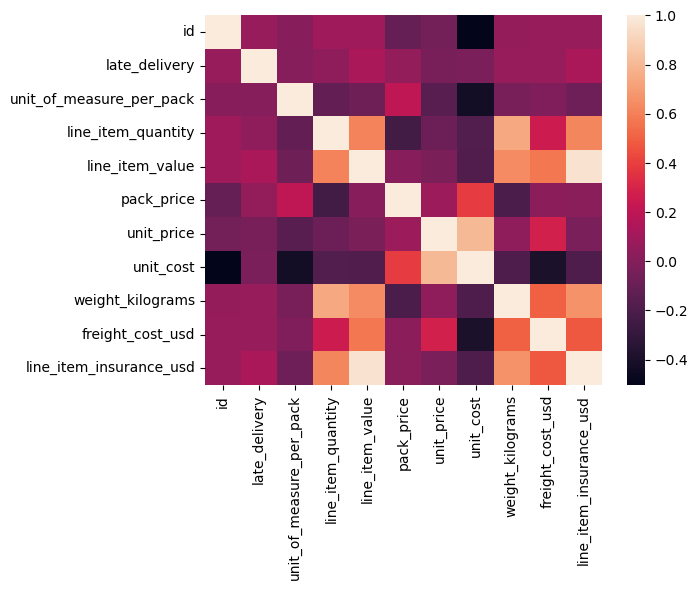

In [10]:
sns.heatmap(df.corr(numeric_only=True))

In [11]:
#correlacion de spearman
display(df.corr(numeric_only=True,method ="spearman"))

,id,late_delivery,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,unit_cost,weight_kilograms,freight_cost_usd,line_item_insurance_usd
id,1.000000,0.061407,0.014583,0.099162,0.066871,-0.083258,-0.099070,-0.590547,0.059319,0.023845,0.043288
late_delivery,0.061407,1.000000,0.076509,0.106965,0.172973,0.062250,0.022577,0.186682,0.137584,0.103445,0.183476
unit_of_measure_per_pack,0.014583,0.076509,1.000000,-0.156105,0.032817,0.327393,-0.298297,-0.522619,-0.055210,0.029569,0.045148
line_item_quantity,0.099162,0.106965,-0.156105,1.000000,0.779751,-0.489412,-0.390340,-0.542665,0.886139,0.595014,0.763196
line_item_value,0.066871,0.172973,0.032817,0.779751,1.000000,0.123140,0.091047,-0.001228,0.807437,0.721744,0.989540
pack_price,-0.083258,0.062250,0.327393,-0.489412,0.123140,1.000000,0.775765,0.600738,-0.273783,0.054271,0.143662
unit_price,-0.099070,0.022577,-0.298297,-0.390340,0.091047,0.775765,1.000000,0.865397,-0.223737,0.046473,0.110120
unit_cost,-0.590547,0.186682,-0.522619,-0.542665,-0.001228,0.600738,0.865397,1.000000,-0.497238,-0.376919,0.000000
weight_kilograms,0.059319,0.137584,-0.055210,0.886139,0.807437,-0.273783,-0.223737,-0.497238,1.000000,0.747872,0.796384
freight_cost_usd,0.023845,0.103445,0.029569,0.595014,0.721744,0.054271,0.046473,-0.376919,0.747872,1.000000,0.704827


<Axes: >

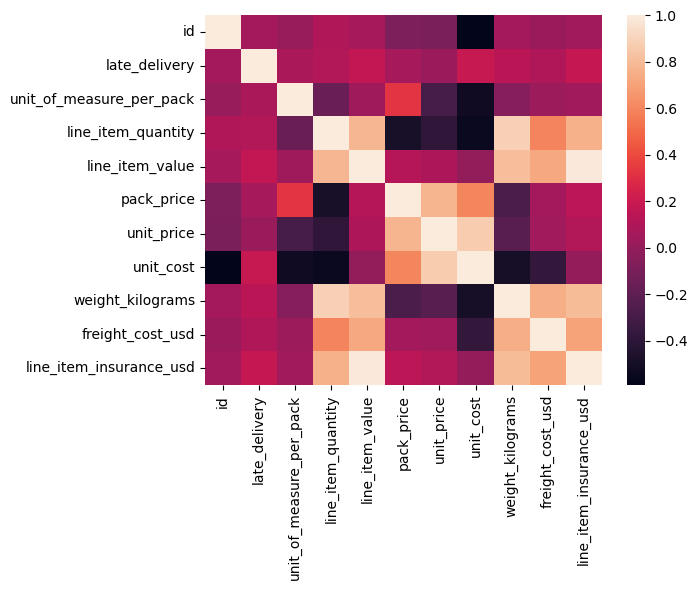

In [12]:
sns.heatmap(df.corr(numeric_only=True,method ="spearman"))

En general las correlaciones de spearman se ven mas marcadas respecto a las de pearson, es decir los valores no cambian mucho pero en las correrlaciones de spearman se volvieron mas fuertes.



## Paso 5: Muestre los gráficos de distribución de las columnas, elija el tipo de gráfico adecuado para el tipo de variable que está analizando.

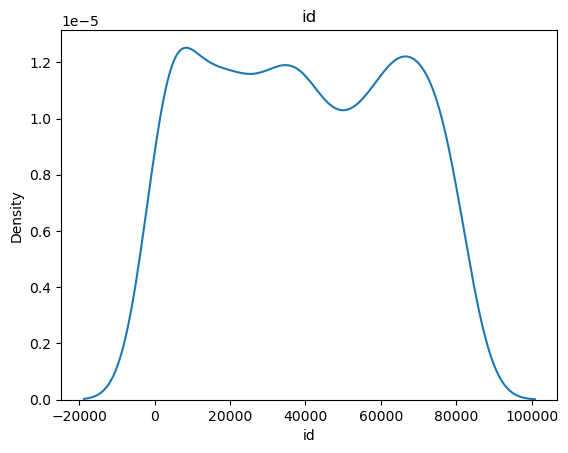

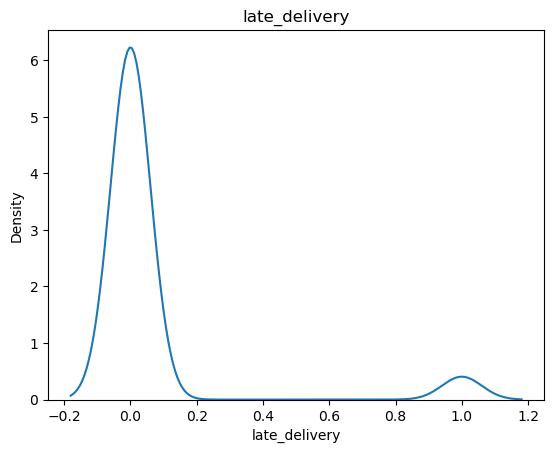

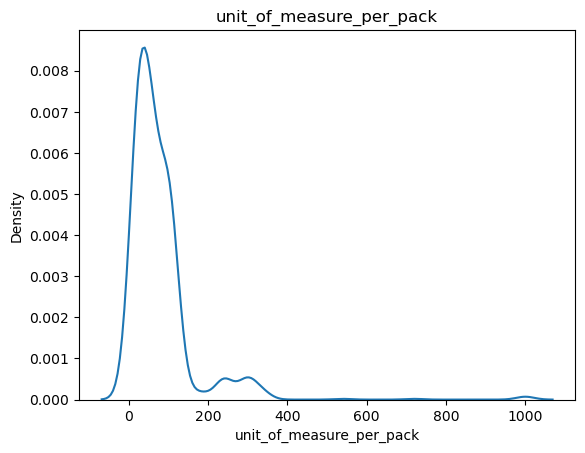

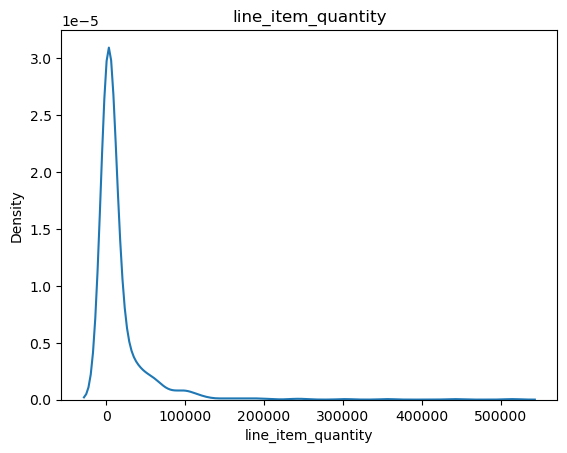

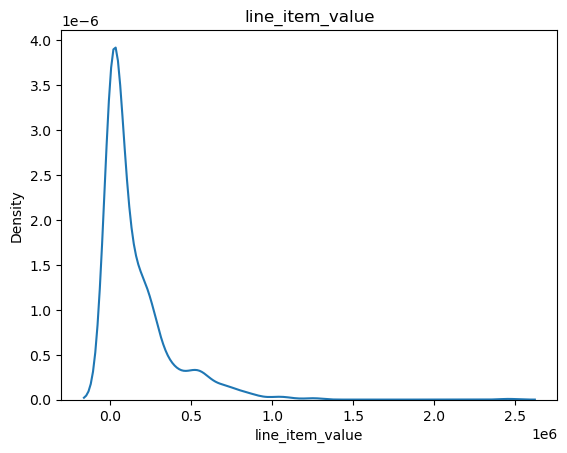

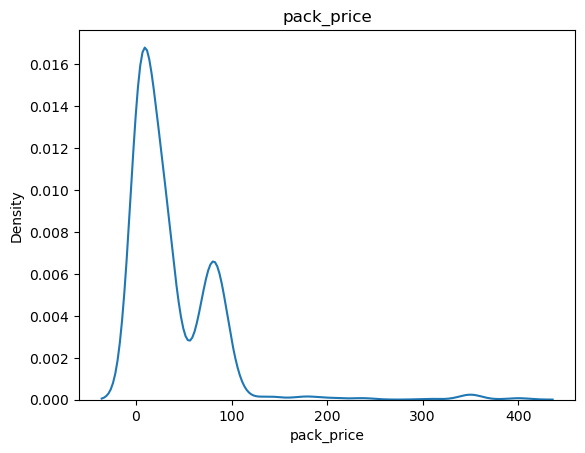

In [ ]:
# Su código aquí.
columnas_numericas = df.select_dtypes(include=['int', 'float']).columns

for columna in columnas_numericas:
    sns.kdeplot(data=df, x=columna)
    plt.title(columna)
    plt.show()

In [ ]:
columnas_objeto = df.select_dtypes(include=['object']).columns

for columna in columnas_objeto:
    sns.histplot(data=df, x=columna)
    plt.title(columna)
    plt.show()

# ETAPA 2: Manipulación y tratamiento de los datos.

## Paso 1: Trate los datos nulos, emplee las técnicas que considere más adecuadas de acuerdo al caso específico. Justifique el porqué de la técnicas que escogió.

In [ ]:
# Su código aquí.
#eliminando columnas
#creando un limite 
limite = len(df)*0.70
print("El limite para eliminar una columna ", limite)
#Filtrando columnas con el menos del 70% de datos nulos
columnas_a_mantener = df.columns[df.isna().sum() <= limite]
df_sin_nulos = df[columnas_a_mantener].copy()

In [ ]:
#eliminado filas nulos con menos del 5% de los datos
limite = len(df)*0.05
print("El limite para eliminar las filas ", limite)
columnas_a_eliminar = df_sin_nulos.columns[df_sin_nulos.isna().sum() <= limite]

#Eliminando datos nulos en columnas que superan el limite
df_sin_nulos = df_sin_nulos.dropna(subset=columnas_a_eliminar).copy()

In [ ]:
#restantes
print(df_sin_nulos.isna().sum().sort_values(ascending=False))

In [ ]:
#inputando la moda
moda = df_sin_nulos["dosage"].mode()[0]
df_sin_nulos["dosage"].fillna(moda, inplace=True)

In [ ]:
#comprobacion
print(df_sin_nulos.isna().sum().sort_values(ascending=False))

Para tratar los datos nulos primero decidi eliminar las columnas con mas del 70% de sus datos nulos, posteriormente elimine por filas hasta el 5% de los datos nulos, para los restantes, que fue una columna de tipo objeto use la moda para inputar los datos faltantes. tome la desicion de eliminar columnas por que un numero muy alto de datos nulos podria hacerme perder muchos datos y decidi inputar la moda porque considero que es el mejor datos estadistico para imputar en columnas objeto.

## Paso 2: Convierta en categorías las variables objeto que considere adecuadas, en caso de ser necesario, trate las inconsistencias.

In [ ]:
# Su código aquí.
for columna in df_sin_nulos.columns:
    # Verifica si la columna es de tipo objeto y tiene un número de valores únicos menor o igual a 15
    if df_sin_nulos[columna].dtype == "object" and df_sin_nulos[columna].nunique() <= 15:
        # Convierte la columna en categoría
        df_sin_nulos[columna] = df_sin_nulos[columna].astype("category")

print(df_sin_nulos.info())

In [ ]:
#eliminando inconsistencias
print(df_sin_nulos["dosage_form"].value_counts())
# Obtener los valores únicos esperados de la categoría "dosage_form"
expected_values = ["Test kit","Tablet","Tablet - FDC","Capsule","Oral solution","Chewable/dispersible tablet","Delayed-release capsules","Test kit - Ancillary","Oral suspension"]

# Detectar inconsistencias
inconsistencias = set(df_sin_nulos["dosage_form"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)
datos_inconsistentes = df_sin_nulos["dosage_form"].isin(inconsistencias)

#Eliminando Valores
df_sin_nulos = df_sin_nulos[~datos_inconsistentes]

#eliminando inconsistencias
print(df_sin_nulos["sub_classification"].value_counts())
# Obtener los valores únicos esperados de la categoría "dosage_form"
expected_values = ["Adult","HIV test","Pediatric","HIV test - Ancillary"]

# Detectar inconsistencias
inconsistencias = set(df_sin_nulos["sub_classification"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)
datos_inconsistentes = df_sin_nulos["sub_classification"].isin(inconsistencias)

#Eliminando Valores
df_sin_nulos = df_sin_nulos[~datos_inconsistentes]

#eliminando inconsistencias
print(df_sin_nulos["product_group"].value_counts())
# Obtener los valores únicos esperados de la categoría "dosage_form"
expected_values = ["ARV","HRDT"]

# Detectar inconsistencias
inconsistencias = set(df_sin_nulos["product_group"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)
datos_inconsistentes = df_sin_nulos["product_group"].isin(inconsistencias)

#Eliminando Valores
df_sin_nulos = df_sin_nulos[~datos_inconsistentes]

#eliminando inconsistencias
print(df_sin_nulos["shipment_mode"].value_counts())
# Obtener los valores únicos esperados de la categoría "dosage_form"
expected_values = ["Air","Ocean"]

# Detectar inconsistencias
inconsistencias = set(df_sin_nulos["shipment_mode"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)
datos_inconsistentes = df_sin_nulos["shipment_mode"].isin(inconsistencias)

#Eliminando Valores
df_sin_nulos = df_sin_nulos[~datos_inconsistentes]

#eliminando inconsistencias
print(df_sin_nulos["vendor_inco_term"].value_counts())
# Obtener los valores únicos esperados de la categoría "dosage_form"
expected_values = ["EXW","FCA","DDP","CIP"]

# Detectar inconsistencias
inconsistencias = set(df_sin_nulos["vendor_inco_term"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)
datos_inconsistentes = df_sin_nulos["vendor_inco_term"].isin(inconsistencias)

#Eliminando Valores
df_sin_nulos = df_sin_nulos[~datos_inconsistentes]

## Convirtiendo Categoricos a numerico

In [ ]:
# Columnas para convertir a numérico con onehotEncoding
columnas_a_numerico = df_sin_nulos.select_dtypes(include=["category"]).columns

# Obtener las columnas categóricas codificadas en one-hot sin columnas para valores de 0
df_dummies = pd.get_dummies(df_sin_nulos[columnas_a_numerico], dummy_na=False)

# Concatenar el resultado
df_limpio = pd.concat([df_sin_nulos, df_dummies], axis=1)

# Eliminar columnas ya categorizadas
columnas_a_mantener = df_limpio.columns[~df_limpio.columns.isin(columnas_a_numerico)]

df_previo = df_limpio[columnas_a_mantener].copy()
df_previo = df_previo.loc[:, (df_previo != 0).any(axis=0)]

In [ ]:
#convierto columnas categoricas restantes de interes a numericas 
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.items():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [ ]:
columnas_categoricas = df_previo.select_dtypes(include=['object'])
df_category = pd.DataFrame(data=columnas_categoricas, columns=columnas_categoricas.columns)

columnas_numericas = df_previo.select_dtypes(include=['int','uint8', 'float'])
df_numeric = pd.DataFrame(data=columnas_numericas, columns=columnas_numericas.columns)

# Crear una instancia del codificador
encoder = MultiColumnLabelEncoder()

# Aplicar la transformación a todas las columnas categóricas
df_category = encoder.fit_transform(df_category)

df_final = pd.concat([df_numeric, df_category], axis=1)

In [ ]:
#Comprobacion de que todo el data set es numerico
print(df_final.info())

## Paso 3: Utilice el coeficiente de variación para determinar qué columnas (variables) numéricas tienen mayor dispersión.

In [ ]:
# Su código aquí.
cv = (df_final.std(numeric_only=True) / df_final.mean(numeric_only=True))
columnas_con_cv_mayor_a_1 = cv[cv > 1].index
display(cv)

## Paso 4: De las variables con mayor dispersión, presente su distribución, su gráfico boxplot, y describa a qué se debe que haya tanta dispersión.

In [ ]:
# Su código aquí.
#Distribuciones
for columna in columnas_con_cv_mayor_a_1:
    if len(df_final[columna].unique()) <= 10:
        sns.histplot(data=df_final, x=columna, hue=columna)
        plt.title(columna)
        plt.show()
    else: 
        sns.histplot(data=df_final, x=columna)
        plt.title(columna)
        plt.show()

In [ ]:
#boxplot
for columna in columnas_con_cv_mayor_a_1:
    sns.boxplot(data=df_final, x=columna)
    plt.title(columna)
    plt.show()

### Explicacion
Como se observa los coeficientes de variaciones en algunas columnas son altos esto se debe en algunos casos ala naturaleza de los mismos datos, al observar las graficas de distribuciones y graficas de boxplot se ve a un mas claro la dispersion entre las que seleccione como columnas con mucha dispersion, a mi criterio esto ocurre por que en estas columnas, la mayoria de los valoes estan concentrados en valores cercanos a 0, y  el resto de los datos estan dispersos en otros valores lo que al momento de comparar con la media, denota mas la dispersion de los mismos , es decir se puede apreciar con claridad donde estan concentrados los datos y como 1 solo valor exageradamente fuera de la media, afecta terriblemente la disperion.

## Paso 5: Conteste las siguientes preguntas acorde a la información obtenida de los datos.
#### ¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "line_item_insurance_usd"? Si, aunque las nuevas columnas numericas podrian destacar nuevas correlaciones.

#### ¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "late_delivery"?Si Considero que si.

#### ¿Cree que alguna otra columna (objeto o categórica) se pueda correlacionar fuertemente con "late_delivery"?, si es así, ¿cuál o cuáles cree que tendrían una correlación fuerte? Para no quedarse sin herrameintes de predicciones, con anterioridad transforme todo el dataset a numerico para ver si alguna columnas tiene correlaciones verdaderamente importantes, por lo que solo seria cuestion de revisar las correlacion para darse cuenta.

# ETAPA 3: Construcción de un modelo de regresión lineal.

## Paso 1: Seleccionar las columnas que estén más correlacionadas con "line_item_insurance_usd" y asígnelas en la variable "X", seleccione la columna "line_item_insurance_usd" y asignela a la variable "y".

In [ ]:
# Su código aquí.
correlaciones=df_final.corr(numeric_only=True)["line_item_insurance_usd"]
correlations_positive = df_final.corr(numeric_only=True)['line_item_insurance_usd'][df_final.corr(numeric_only=True)['line_item_insurance_usd'] > 0.2]
correlations_negative = df_final.corr(numeric_only=True)['line_item_insurance_usd'][df_final.corr(numeric_only=True)['line_item_insurance_usd'] <= -0.2]

mejoresCorrelaciones= correlations_positive.index.tolist() + correlations_negative.index.tolist()
if "line_item_insurance_usd" in mejoresCorrelaciones:
    mejoresCorrelaciones.remove("line_item_insurance_usd")


print("Mejores correlaciones")
print(mejoresCorrelaciones)


In [ ]:
#Definiendo X
X= df_final[mejoresCorrelaciones]
display(X)

In [ ]:
#Definiendo Y
y=df_final["line_item_insurance_usd"]
display(y)

## Paso 2: Divida en dos muestras los dos dataframes creados anteriormente (X,y), debe tener una muestra para entrenamiento y otra para pruebas, el tamaño de la muestra de entrenamiento debe ser del 80%, asigne una semilla aleatoria con valor de 2033 para poder brindar reproducibilidad.

In [ ]:
# Su código aquí.
X_train, X_test, Y_train, Y_test = train_test_split(
    X,y,test_size=0.2, random_state=2033)

## Paso 3: Importe el modelo de regresión lineal (multivariable) de sklearn, entrene el modelo con el set de datos de entrenamiento, posteriormente haga predicciones con el set de pruebas (X_train).

In [ ]:
# Su código aquí.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score
linealR=LinearRegression()
linealR.fit(X_train,Y_train)
y_predict=linealR.predict(X_test)

## Paso 4: Evalúe el modelo con la métrica "accuracy_score" y la métrica "f1_score" (ambas disponibles con sklearn).

In [ ]:
# Su código aquí.
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print("Mean Squared Error (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

## Paso 5: Responda.
#### ¿Su modelo fue capaz de realizar predicciones con precisión? Si ,el modelo tiene la capacidad de predecir con exactitud.
#### ¿A qué cree que se deba el rendimiento de su modelo? Estoy casi seguro que es por las correlaciones tan fuertes que hay, hay una columna que tiene un 0.96 de correlacion, eso explica los resultados.
#### Si selecciona todas las variables y las asigna en X, en lugar de las que tienen correlación más fuerte, ¿cree que el modelo mejore o empeore? Pienso que empeoraria o se mantendria casi igual esto debido al nivel de correlacion.

# ETAPA 4: Hipótesis.

## Paso 1: Defina la hipótesis nula a partir de la siguiente pregunta:
#### ¿La proporción de entrega tarde ("late_delivery") es mayor a 0.06 (6%)?, asigne el valor de la hipótesis nula a la variable "Ho".
#### Considere un nivel de significación del 5%.

In [ ]:
# Su código aquí
Ho=0.06
alfa=0.05

## Paso 2: Defina la hipótesis alternativa según la pregunta anterior, solo escríba cómo quedaría y qué tipo de prueba de hipótesis se utilizará.

Su respuesta: La proporción de entrega tarde ("late_delivery") es mayor a 0.06 (6%)

## Paso 3: Haga una distribución bootstrap de la columna "late_delivery" y calcule el error estándar, guárdelo en una variable. El tamaño de la lista de la distribución de boostrap queda a libre elección, muestre un histograma de la distribución bootstrap.

In [ ]:
mean_late_delivery_10000 = []
for i in range(10000):
    mean_late_delivery_10000.append(
        np.mean(df_final['late_delivery'].sample(frac=1, replace=True))
    )
error_estandar=np.std(mean_late_delivery_10000, ddof=1)
print("El error estandar es ",error_estandar)

sns.histplot(data=mean_late_delivery_10000)
plt.title("Histograma de late_delivery")
plt.xlabel("Valor Promedio de late_delivery")
plt.show()


## Paso 4: Calcule la puntuación Z y guárdela en una variable.

In [ ]:
# Su código aquí.
mean=df_final['late_delivery'].mean()
z_score=(mean - Ho) /error_estandar
print("El valor de z score es " , z_score)

## Paso 5: Dependiendo del tipo de prueba, calcule el valor de P (p-value) y diga si puede rechazar (o falla al rechazar) la hipótesis nula.
## Calcule el intervalo de confianza, utilice los cuantiles adecuados dado el nivel de significación establecido previamente.

In [ ]:
# Su código aquí.
from scipy.stats import norm
p_value=1 - norm.cdf(z_score , loc=0, scale=1)
print("El valor de p es ", p_value)

In [ ]:
if p_value <= alfa:
    print("Se rechaza la hipotesis nula")
else:
    print("Se fallo al rechazar la hipotesis nula")

In [ ]:
mas_bajo=np.quantile(mean_late_delivery_10000,0.025)
mas_alto=np.quantile(mean_late_delivery_10000,0.975)
print((mas_bajo,mas_alto))